# Evaluation Project - 4
## Global Power Plant Database

Problem Statement:
Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Key attributes of the database
The database includes the following indicators:

`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
`country_long` (text): longer form of the country designation
`name` (text): name or title of the power plant, generally in Romanized form
`gppd_idnr` (text): 10 or 12 character identifier for the power plant
`capacity_mw` (number): electrical generating capacity in megawatts
`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`primary_fuel` (text): energy source used in primary electricity generation or export
`other_fuel1` (text): energy source used in electricity generation or export
`other_fuel2` (text): energy source used in electricity generation or export
`other_fuel3` (text): energy source used in electricity generation or export
 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
`owner` (text): majority shareholder of the power plant, generally in Romanized form
`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
`url` (text): web document corresponding to the `source` field
`geolocation_source` (text): attribution for geolocation information
`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
`year_of_capacity_data` (number): year the capacity information was reported
`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
`generation_data_source` (text): attribution for the reported generation information
`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 
Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

Find the dataset link below. 

Downlaod Files:
https://github.com/wri/global-power-plant-database/blob/master/source_databases_csv/database_IND.csv

### Importing require library for performing EDA, Data Wrangling and data cleaning

In [8]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [9]:
# Importing CSV File
df=pd.read_csv('Global_power_plant.csv')
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [10]:
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])

No of Rows: 907
No of Columns: 27


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

comment:
Some of feature are with object datatypes and other with float.

other_fuel3,estimated_generation_gwh,wepp_id,other_fuel2 are empty columns.

# Statistical Analysis
### Before Going for Statistical exploration of data, first check integrity of data & Missing value

Data Integrity Check
Let check if any whitespace,'?' 'NA' or '-' exist in dataset.

In [13]:
df.isin([' ','NA','-','?']).sum().any()

False

Comment:

No whitespace, NA, '-' exist in dataset.

In [14]:
df.duplicated().sum()

0

If we Check CSV file and look at dataset head, there are lot of data cleaning operation need to done before performing any EDA and ML modelling.At first sight we can come across following observation in CSV file:

Lot of missing data in certain columns.
Lot of Non relevant data like gppd_idnr,url.
and many more.
At end data need to clean and we will try to do some feature engineering afterwards to modify some columns.</em></b>

Before checking null value and missing value imputation , first remove empty columns and non relevalent columns.

estimated_generation_gwh - Empty
wepp_id - Empty
other_fuel2 - 98% data missing
other_fuel3 - Empty
owner - More than 60 % data missing
year_of_capacity_data - Missing data with single unique value
country - non relevalent info
country_long - non relevalent info
gppd_idnr -non relevalent info
url - No missing value but of no use </b>

In [17]:
df.drop(columns=["country","country_long",'url','year_of_capacity_data','generation_gwh_2013',
                 'gppd_idnr','owner','other_fuel3','other_fuel2','generation_gwh_2019',
                 'estimated_generation_gwh','wepp_id'],axis=1,inplace=True)

In [18]:
#Finding what percentage of data is missing from the dataset
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                        Missing Values  % Missing data
other_fuel1                        709       78.169791
generation_gwh_2014                509       56.119074
generation_gwh_2015                485       53.472988
generation_gwh_2016                473       52.149945
generation_gwh_2017                467       51.488423
generation_gwh_2018                459       50.606395
generation_data_source             458       50.496141
commissioning_year                 380       41.896362
latitude                            46        5.071665
longitude                           46        5.071665
geolocation_source                  19        2.094818
name                                 0        0.000000
capacity_mw                          0        0.000000
primary_fuel                         0        0.000000
source                               0        0.000000


In [19]:
df.head()

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,NaN,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,NaN,2004.0,Central Electricity Authority,WRI,617.789264,843.747,886.004428,663.774500,626.239128,Central Electricity Authority
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,WRI,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,Central Electricity Authority


### Proposed Strategy to Handle Missing data :

As Geolocation source is categorical data we can impute it with mode of category.

longitude and latitude can be impute with mean or median of longitude and latitude. This imputation will not distrub statstical balance of data as mean will be same at the end.

As commissioning year for most of industrial powerplant is missing(40%) after checking correlation we will decide to keep or drop this features.

In generation_data_source 50% data is missing and it doesnot have any importance in our analysis. So it is better to drop this feature.

There are 5 Different columns of GenerationGW-Hours for year 2013 to 2017. Its dive into it further

It is important feature in for coal and hydro powerplant.

It is natural to have missing data in this category. As Oil,Gas based Powerplant operated in intermitant periodic way and some renewable powerplant like wind,tide are operated seasonaly.

Some new powerplant commission between 2013 and 2018. For these powerplant some data will definitely available.

We cannot do any mean or median imputation here as different powerplant have different generation capacity & 

Generation per year depend on runtime of powerplant.

We all know old powerplant normally kept off unless more demand of generation required. Reason to kept is low efficiency & high operating cost.

We can neglect real value data for such important feature. We will keep this feature along with missing value and perform further investigation.
Other_fuel1 is another feature of some importance with missing value. Lets dive into it :

Not every powerplant build to work with alternate fuel.

Idea of other fuel is totally irrelevant to renewable energy source based powerplant like solar,wind,hydro.

First talk about powerplant for which concept of other fuel is applicable. We can impute them based domain knowledge.

Alternate Fuel of Coal based powerplant mostly is Oil or cogeneration.

Alternate Fuel of Industrial Oil based powerplant is Gas.

Alternate Fuel of Industrial Gas based powerplant is Oil.

We cannot define any alternative fuel for nuclear powerplant as it sole based on plant design & so many option.
For Renewable energy source based powerplant no alternate fuel needed. As it is categorical feature we can impute these powerplant with "Not Applicable". At end we are going Encoding these labels, 'Not Applicable' will be just one other additional label in encoding. Making no alternation on final result.

## Missing value Impuatation


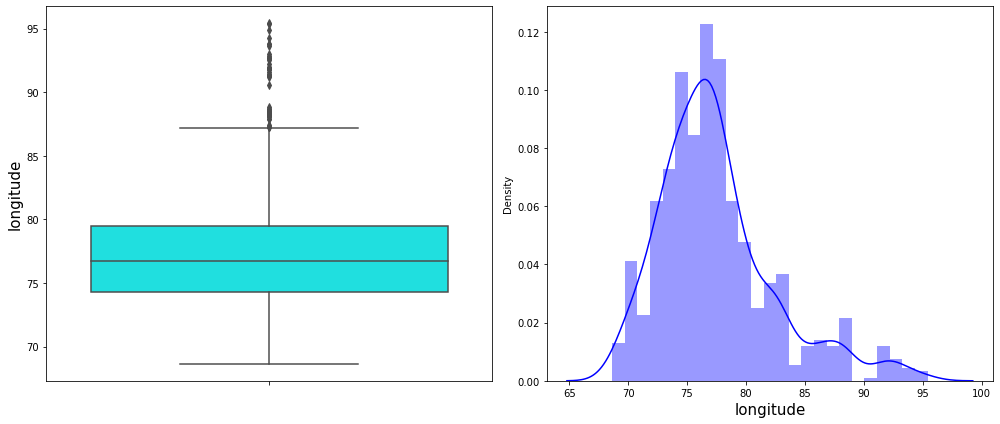

In [20]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot( y='longitude', data=df,color='cyan')
plt.ylabel('longitude',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['longitude'], color='b')
plt.xlabel('longitude',fontsize=15)
plt.tight_layout()
plt.show()

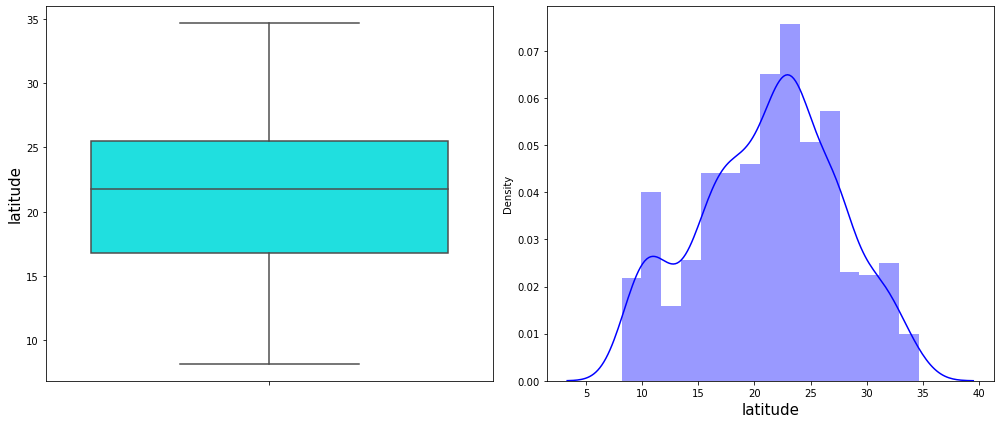

In [21]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot( y='latitude', data=df,color='cyan')
plt.ylabel('latitude',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['latitude'], color='b')
plt.xlabel('latitude',fontsize=15)
plt.tight_layout()
plt.show()

In [22]:
# Missing Value Imputation of geolocation with mode
df['geolocation_source'] = df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])
# Missing Value Imputation of longitude with median
df['longitude'] = df['longitude'].fillna(df['longitude'].median())
# Missing Value Imputation of latitude with mean
df['latitude'] = df['latitude'].fillna(df['latitude'].mean())

In [23]:
#Finding what percentage of data is missing from the dataset
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                        Missing Values  % Missing data
other_fuel1                        709       78.169791
generation_gwh_2014                509       56.119074
generation_gwh_2015                485       53.472988
generation_gwh_2016                473       52.149945
generation_gwh_2017                467       51.488423
generation_gwh_2018                459       50.606395
generation_data_source             458       50.496141
commissioning_year                 380       41.896362
name                                 0        0.000000
capacity_mw                          0        0.000000
latitude                             0        0.000000
longitude                            0        0.000000
primary_fuel                         0        0.000000
source                               0        0.000000
geolocation_source                   0        0.000000


In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
capacity_mw,907.0,326.223755,590.085456,0.0000,16.725000,59.200000,385.250000,4760.000
latitude,907.0,21.197918,6.079148,8.1689,17.072000,21.281800,25.176450,34.649
longitude,907.0,77.427103,4.815073,68.6447,74.388900,76.719500,79.206100,95.408
commissioning_year,527.0,1997.091082,17.082868,1927.0000,1988.000000,2001.000000,2012.000000,2018.000
generation_gwh_2014,398.0,2431.823590,4026.440035,0.0000,223.557672,801.123775,3035.306250,28127.000
generation_gwh_2015,422.0,2428.226946,4194.596959,0.0000,176.381063,711.181225,3084.121250,30539.000
generation_gwh_2016,434.0,2467.936859,4162.884308,0.0000,188.285252,737.205450,3282.861313,30015.000
generation_gwh_2017,440.0,2547.759305,4196.991169,0.0000,177.874930,817.977250,3275.690475,35116.000
generation_gwh_2018,448.0,2600.804099,4314.880456,0.0000,193.378250,751.644375,3143.535900,35136.000


Observation:

Bigest Powerplant has power generation capacity of 4760 MW.

In each Generation-GWHours columns Mean is greater than Median.

Powerplants are located in latitude range of 8.1689 to 34.6490 while longitudal range is 68.64 to 95.4080.

Oldest powerplant commission date back to 1927 and most recent powerplant is build in 2018. We will check in which timeframe most of powerplants are commission.

Median of capacity MW is 60 MW. This suggest that there are lot of small capacity powerplant in dataset.

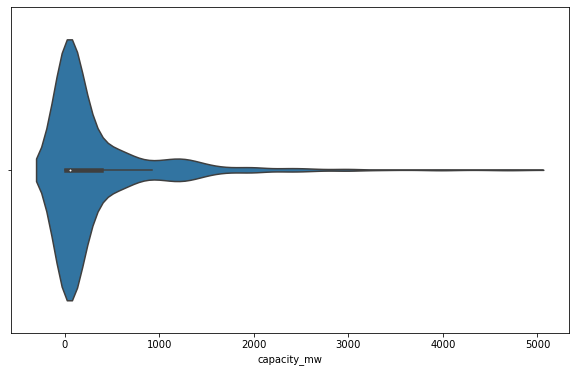

In [25]:
plt.figure(figsize=(10,6))
sns.violinplot(df.capacity_mw)
plt.show()

We can see there are very powerplant of capacity more than 1500 MW. Let check



In [16]:
df.loc[df.capacity_mw >1500].shape

(39, 15)

In [17]:
pd.crosstab(df['capacity_mw'],df["primary_fuel"], margins=True).T.style.background_gradient(cmap='summer_r')

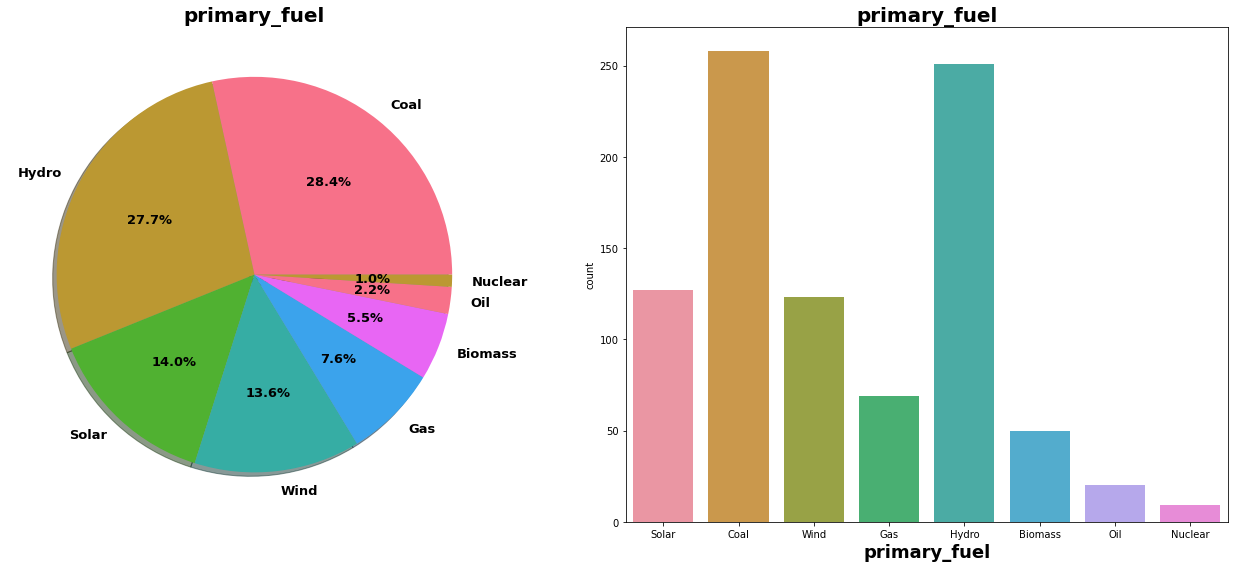

In [18]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(18,8))
df['primary_fuel'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('primary_fuel', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('primary_fuel',data=df,ax=ax[1])
ax[1].set_title('primary_fuel',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("primary_fuel",fontsize=18,fontweight ='bold')
plt.show()

In [19]:
df.primary_fuel.value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

Comment:

Maximum Number of powerplant are coal based powerplant followed by Hydro energy based powerplants.
Around 40 % Power plant are Unconventional powerplant mainly based on Non Renewable energy resorces.
There are only 9 Nuclear powerplant. Usually these powerplant build for high capacity. It will be interesting to look for capacity of these powerplant.


In [20]:
df["capacity_mw"].groupby(df["primary_fuel"]).agg([sum])

,sum
primary_fuel,
Biomass,1003.260
Coal,205839.220
Gas,25172.506
Hydro,46441.770
Nuclear,8780.000
Oil,1778.840
Solar,2757.500
Wind,4111.850


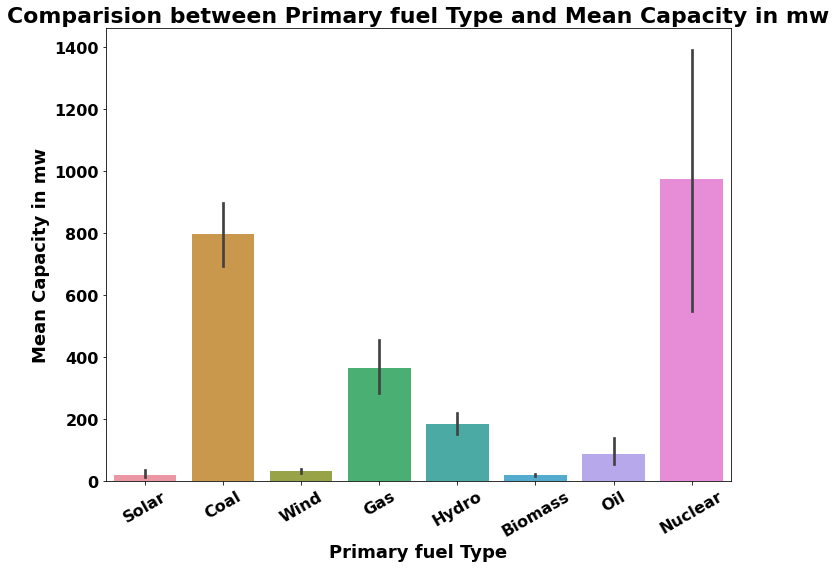

In [21]:
#Lets check the relation between primary_fuel and  Average capacity_mw
plt.figure(figsize = (10,8))
y = df["capacity_mw"]
p = sns.barplot(x = "primary_fuel", y = "capacity_mw", data = df)
plt.title('Comparision between Primary fuel Type and Mean Capacity in mw', fontsize=22, fontweight='bold')
p.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
p.set_ylabel('Mean Capacity in mw',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold',rotation=30)
plt.yticks(fontsize=16,fontweight ='bold')
plt.show()

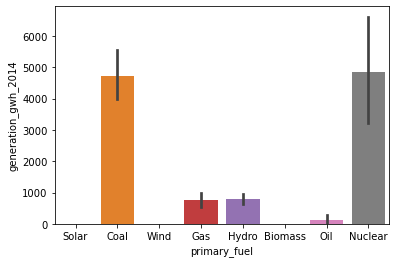

In [37]:
# Checking generation growth in 2014
sns.barplot(x='primary_fuel',y='generation_gwh_2014',data=df)

plt.show()

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2015'>

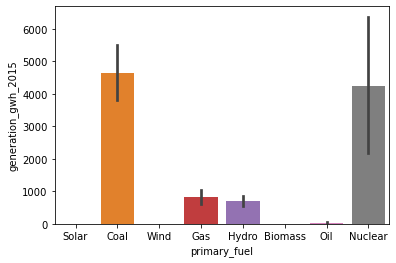

In [38]:
# Checking generation growth in 2015
sns.barplot(x='primary_fuel',y='generation_gwh_2015',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2016'>

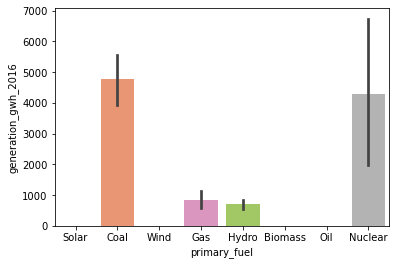

In [39]:
# Checking generation growth in 2016
sns.barplot(x='primary_fuel',y='generation_gwh_2016',data=df,palette="Set2")

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2017'>

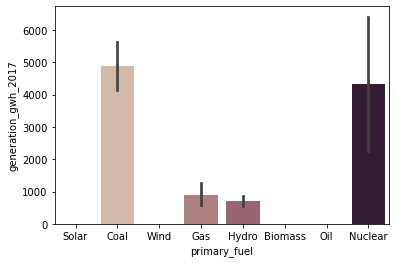

In [40]:
# Checking generation growth in 2017
sns.barplot(x='primary_fuel',y='generation_gwh_2017',data=df,palette="ch:.25")

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2018'>

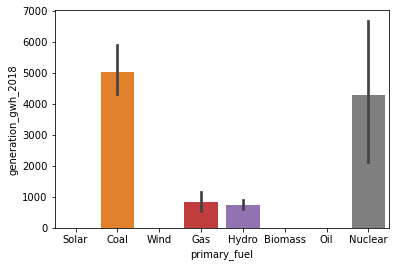

In [41]:
# Checking generation growth in 2018
sns.barplot(x='primary_fuel',y='generation_gwh_2018',data=df)

Comment:

From the graph we can see that Nuclear has high mean electrical generation reports for all the years followed by Coal. Reason is high efficieny of Nuclear powerplants.
Other fuel types have very less contribution to power generation.

### Location and primary fuel comparision 

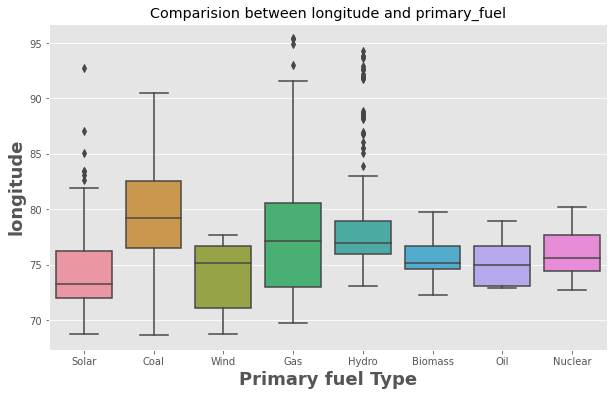

In [42]:
# Let's check how the primary_fuel is reated to longitude of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and primary_fuel')
a = sns.boxplot(df['primary_fuel'],df["longitude"])
a.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
a.set_ylabel('longitude',fontsize=18,fontweight ='bold')
plt.show()

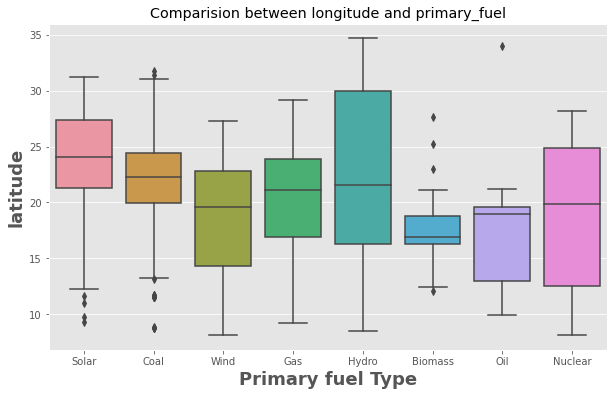

In [43]:
# Let's check how the primary_fuel is reated to Latitude of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and primary_fuel')
a = sns.boxplot(df['primary_fuel'],df["latitude"])
a.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
a.set_ylabel('latitude',fontsize=18,fontweight ='bold')
plt.show()

# Comment:

Location is important feature specially for Nuclear powerplants. These plants lies in between 15 to 25 latitude and 
longitudnal range of 75 to 88 degree.

We can also see solar power plant are mostly establish in certain range of latitude and longitude. This might be due to clear and intense sunlight with minimum humidity.

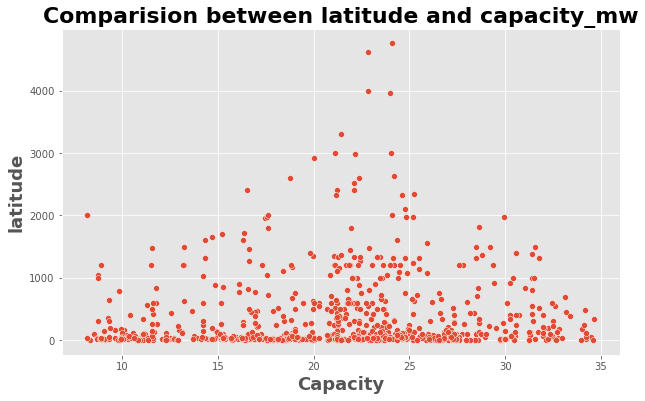

In [44]:
# Let's check how the capacity is reated to latitude of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between latitude and capacity_mw',fontsize=22, fontweight='bold')
a= sns.scatterplot(df['latitude'],df["capacity_mw"])
a.set_xlabel('Capacity',fontsize=18,fontweight ='bold')
a.set_ylabel('latitude',fontsize=18,fontweight ='bold')
plt.show()

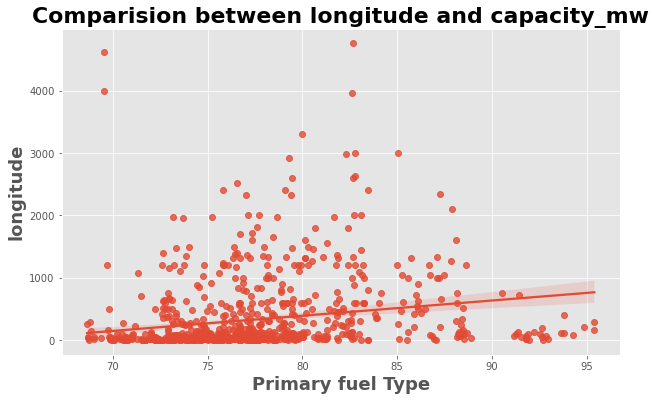

In [45]:
# Let's check how the longitude related to the capacity of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and capacity_mw',fontsize=22, fontweight='bold')
a= sns.regplot(df['longitude'],df["capacity_mw"])
a.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
a.set_ylabel('longitude',fontsize=18,fontweight ='bold')
plt.show()

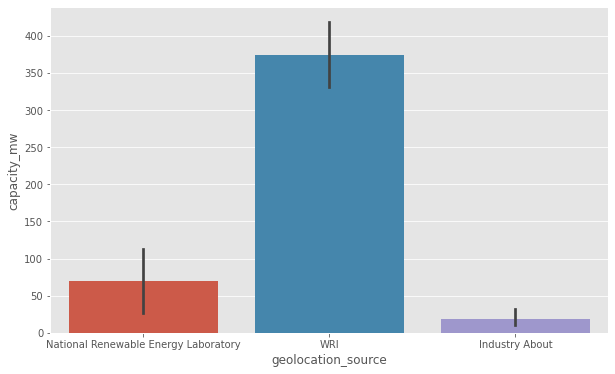

In [47]:
#Lets check the relation between source and capacity_mw
plt.figure(figsize = (10,6))
sns.barplot(x = "geolocation_source", y = "capacity_mw", data = df)
plt.show()

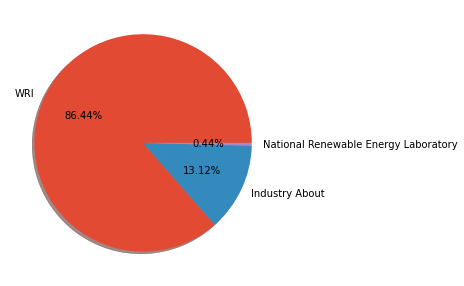

In [48]:
labels='WRI','Industry About','National Renewable Energy Laboratory'
fig, ax = plt.subplots(figsize=(6,5))
ax.pie(df['geolocation_source'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

In [49]:
# Lets impute missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [50]:
df1=df[['capacity_mw','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']]

In [51]:
imputed=IterativeImputer(random_state=42)
imp=imputed.fit_transform(df1)

In [52]:
df2=pd.DataFrame(imp,columns=df1.columns)

In [54]:
df['generation_gwh_2014']=df2['generation_gwh_2014']
df['generation_gwh_2015']=df2['generation_gwh_2015']
df['generation_gwh_2016']=df2['generation_gwh_2016']
df['generation_gwh_2017']=df2['generation_gwh_2017']
df['generation_gwh_2018']=df2['generation_gwh_2018']

In [56]:
df.drop(columns=['generation_data_source'],axis=1,inplace=True)


In [57]:
df.isna().sum()

name                     0
capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
other_fuel1            709
commissioning_year     380
source                   0
geolocation_source       0
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018      0
dtype: int64

In [58]:
df['commissioning_year']=df['commissioning_year'].fillna(df['commissioning_year'].median())

In [60]:
df.head()

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,NaN,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,1288.670952,1342.448818,1186.373783,1064.675602,925.269267
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,NaN,2001.0,Ultratech Cement ltd,WRI,1431.720928,1492.108378,1372.923956,1285.774710,1182.793896
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,NaN,2001.0,CDM,WRI,1343.644084,1399.961968,1258.063745,1149.642484,1024.234229
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,NaN,2004.0,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


In [61]:
df.isna().sum()

name                     0
capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
other_fuel1            709
commissioning_year       0
source                   0
geolocation_source       0
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018      0
dtype: int64

In [62]:
df.drop(columns=['other_fuel1'],axis=1,inplace=True)

In [63]:
df.head()

,name,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,1288.670952,1342.448818,1186.373783,1064.675602,925.269267
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,2001.0,Ultratech Cement ltd,WRI,1431.720928,1492.108378,1372.923956,1285.774710,1182.793896
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,2001.0,CDM,WRI,1343.644084,1399.961968,1258.063745,1149.642484,1024.234229
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


## Encoding categorical data


In [64]:
df.drop(columns=['name'],axis=1,inplace=True)


In [65]:
Category=['primary_fuel', 'source', 'geolocation_source']

In [66]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2011.0,109,1,1288.670952,1342.448818,1186.373783,1064.675602,925.269267
1,98.0,24.7663,74.6090,1,2001.0,174,2,1431.720928,1492.108378,1372.923956,1285.774710,1182.793896
2,39.2,21.9038,69.3732,7,2001.0,21,2,1343.644084,1399.961968,1258.063745,1149.642484,1024.234229
3,135.0,23.8712,91.3602,2,2004.0,22,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2015.0,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


## Outliers detection and removal


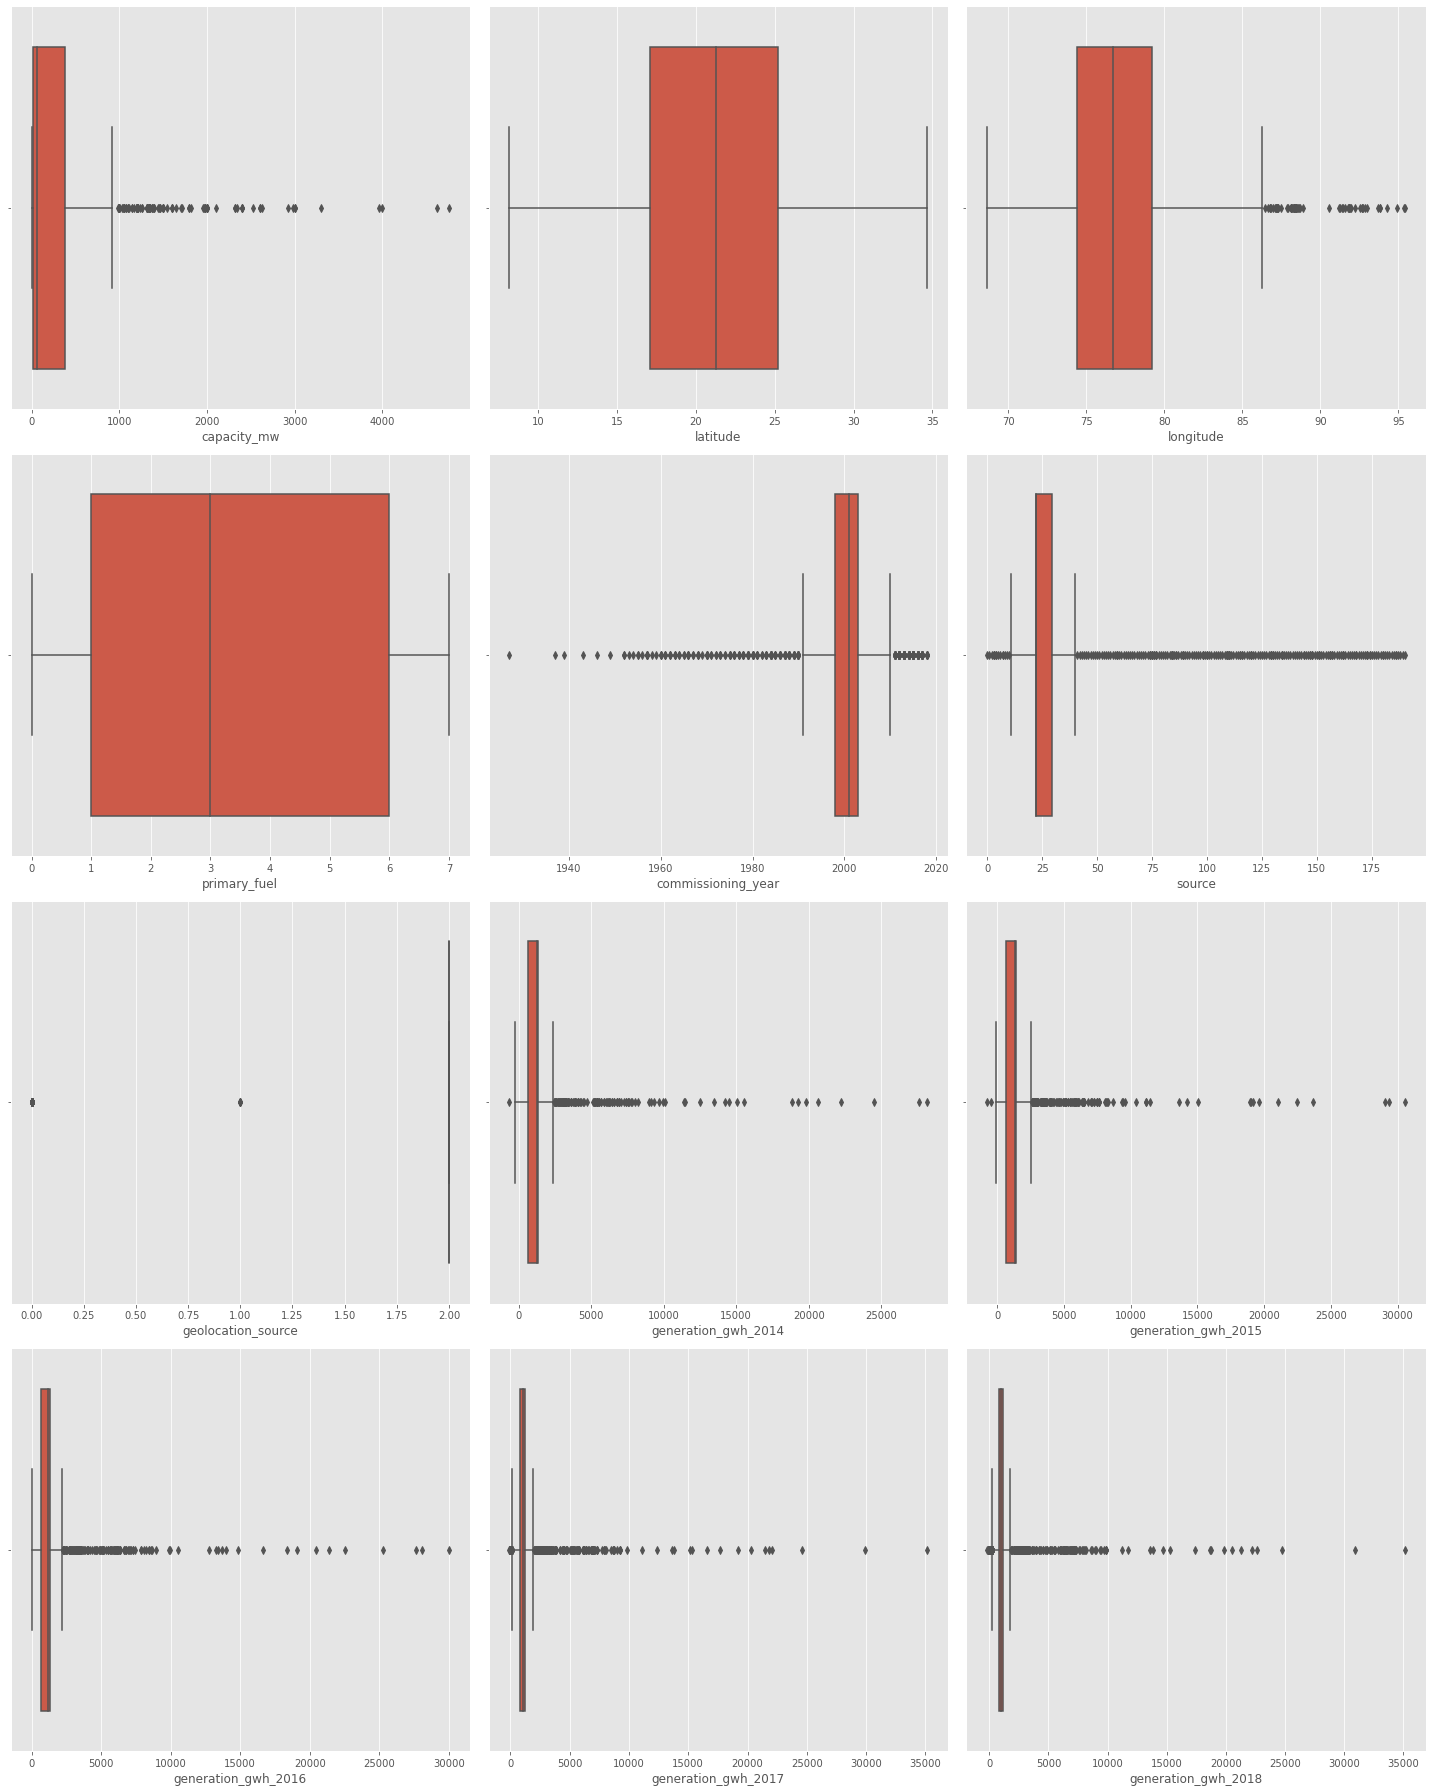

In [70]:
# Identifying the outliers present in numerical columns using boxplot

plt.figure(figsize=(20,25))
plotnumber=1
for column in df:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(df[column])
    plotnumber+=1
plt.tight_layout()

Comment :

There outliers exist in data.
There are no outliers in lower capping level.
So we will use Quantile-based Flooring and Capping technique.


In [72]:
# Removal of unnessary columns
df.drop(columns=['source','geolocation_source'],axis=1,inplace=True)

In [73]:
df2=df.copy

In [76]:
df3=df.copy()
Q1 = df3.quantile(0)
Q3= df3.quantile(0.85)
IQR = Q3 - Q1
print(IQR)

capacity_mw             720.000000
latitude                 19.198860
longitude                13.304440
primary_fuel              6.000000
commissioning_year       84.000000
generation_gwh_2014    2704.272950
generation_gwh_2015    3093.489739
generation_gwh_2016    2480.136000
generation_gwh_2017    2742.038020
generation_gwh_2018    2864.579916
dtype: float64


In [77]:
data = df3[~((df3 < (Q1 - 1.5 * IQR)) |(df3 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data.shape)

(833, 10)


In [81]:
print('Percentage Data Loss :',((908-876)/876)*100,'%')

Percentage Data Loss : 3.65296803652968 %


## Correlation matrix

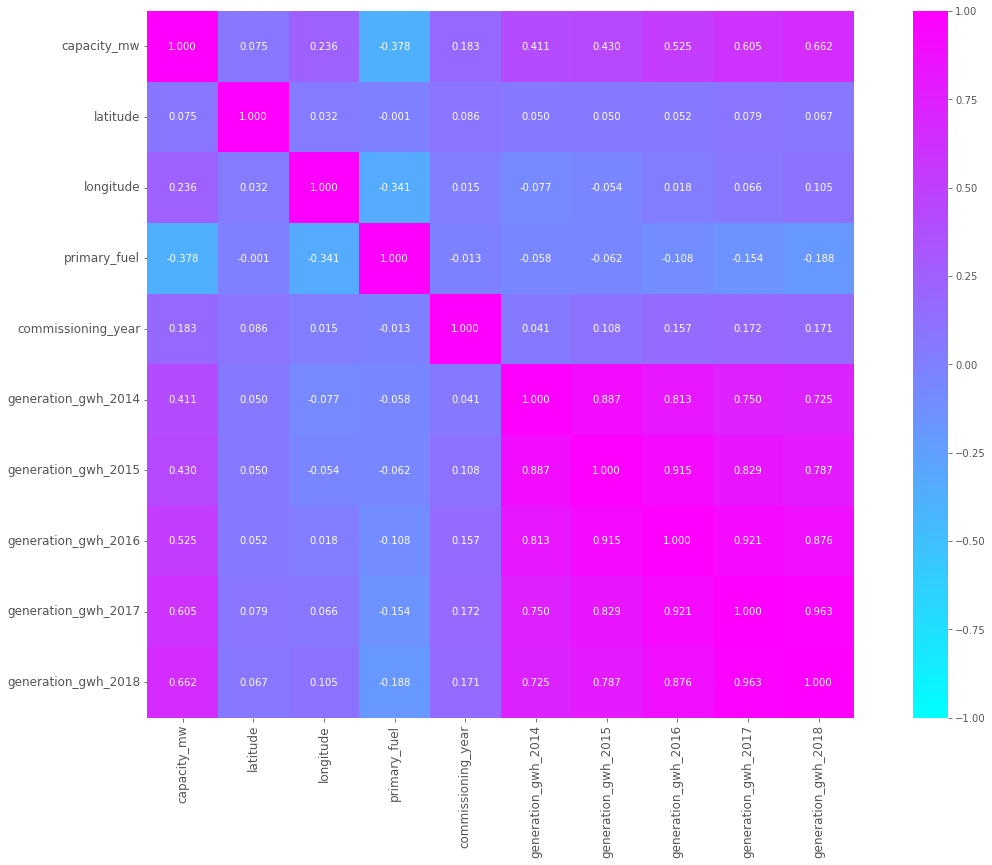

In [82]:
plt.figure(figsize=(21,13))
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="cool")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

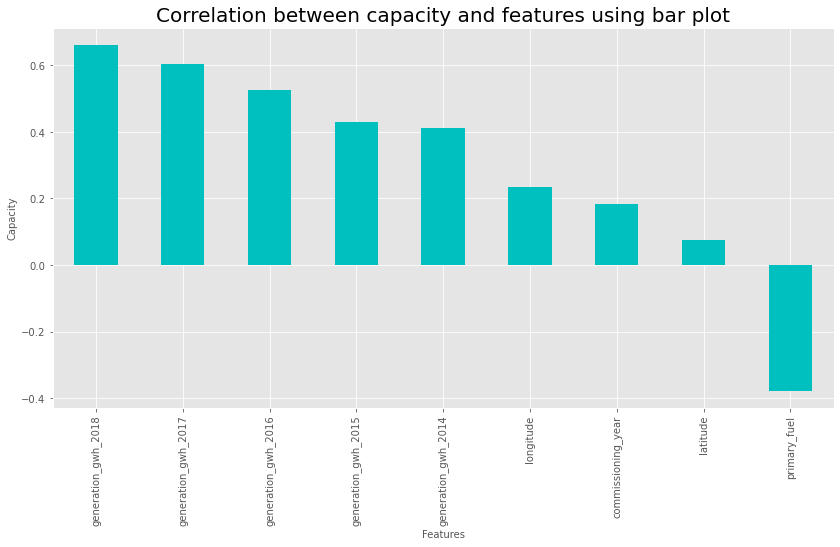

In [83]:
plt.figure(figsize=(14,7))
data.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=10)
plt.ylabel('Capacity',fontsize=10)
plt.title('Correlation between capacity and features using bar plot',fontsize=20)
plt.show()

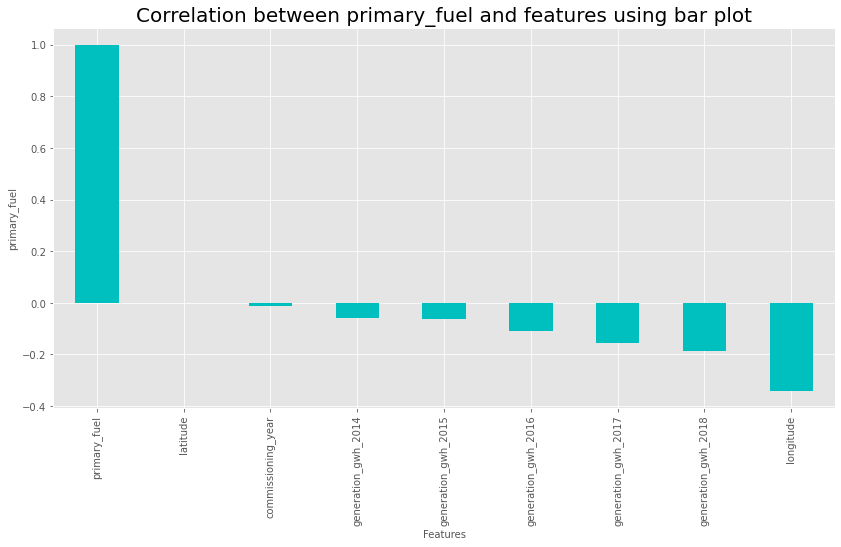

In [84]:
plt.figure(figsize=(14,7))
data.corr()['primary_fuel'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=10)
plt.ylabel('primary_fuel',fontsize=10)
plt.title('Correlation between primary_fuel and features using bar plot',fontsize=20)
plt.show()

In [85]:
df.skew()

capacity_mw            3.123576
latitude              -0.149698
longitude              1.163320
primary_fuel           0.472251
commissioning_year    -1.719575
generation_gwh_2014    5.272530
generation_gwh_2015    5.565956
generation_gwh_2016    5.330119
generation_gwh_2017    5.340741
generation_gwh_2018    5.157706
dtype: float64

In [89]:
skew = ['capacity_mw','commissioning_year','longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

In [90]:
data[skew] = scaler.fit_transform(data[skew].values)
data[skew].head()

,capacity_mw,commissioning_year,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.710174,1.257074,-0.911570,0.217592,0.217013,0.197881,0.113409,0.011825
1,0.374195,0.026111,-0.490207,0.365775,0.363072,0.384272,0.336844,0.285435
2,-0.157368,0.026111,-2.421294,0.275296,0.273820,0.270925,0.201767,0.121101
3,0.556223,0.344699,2.165603,-0.591313,-0.320120,-0.131318,-0.360315,-0.358186
5,0.900592,0.460163,-2.770397,0.071115,0.081425,0.186911,0.200001,0.069278


In [91]:
# checking skewness after using yeo-johnson
data.skew()

capacity_mw           -0.024316
latitude              -0.123712
longitude             -0.002693
primary_fuel           0.353054
commissioning_year     0.063080
generation_gwh_2014   -0.111886
generation_gwh_2015   -0.245191
generation_gwh_2016    0.212036
generation_gwh_2017   -0.136802
generation_gwh_2018   -0.799606
dtype: float64

Since we have done with EDA NOW its time for removal of missing data


In [93]:
data.drop("generation_gwh_2014",axis=1,inplace=True)
data.drop("generation_gwh_2015",axis=1,inplace=True)
data.drop("generation_gwh_2016",axis=1,inplace=True)
data.drop("generation_gwh_2017",axis=1,inplace=True)
data.drop("generation_gwh_2018",axis=1,inplace=True)

# Machine Learning Model Building Classification


In [94]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [95]:
# Splitting data in target and dependent feature
X = data.drop(['primary_fuel'], axis =1)
Y = data['primary_fuel']

In [96]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [97]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=48, test_size=.28)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (599, 4)
Training target vector size: (599,)
Test feature matrix size: (234, 4)
Test target vector size: (234,)


## Finding best Random state


In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,1000):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.28, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.5726495726495726 on Random_state 194


## Logistics Regression Model


In [101]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=194, test_size=.28)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('Logistics Regression Evaluation')
print('\n')
print('Accuracy Score of Logistics Regression :','\n', accuracy_score(Y_test, y_pred))
print('\n')
print('Confusion matrix of Logistics Regression :','\n',confusion_matrix(Y_test, y_pred))
print('\n')
print('classification Report of Logistics Regression','\n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 
 0.5726495726495726


Confusion matrix of Logistics Regression : 
 [[ 0  0  0  2  0  0  0  7]
 [ 0 31  0 14  0  0  0  2]
 [ 0  8  0  4  0  0  0  2]
 [ 0  8  0 51  0  0  7 12]
 [ 0  0  0  1  0  0  0  0]
 [ 0  2  0  4  0  0  0  3]
 [ 0  0  0  5  0  0 26  5]
 [ 0  3  0  5  0  0  6 26]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.60      0.66      0.63        47
           2       0.00      0.00      0.00        14
           3       0.59      0.65      0.62        78
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         9
           6       0.67      0.72      0.69        36
           7       0.46      0.65      0.54        40

    accuracy                           0.57       234
   macro avg       0.29      0.34      0.31     

## Decision Tree Classifier


In [102]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=194, test_size=.28)
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
y_pred=dtc.predict(X_test)
print('DecisionTreeClassifier Evaluation')
print('\n')
print('Accuracy Score of DecisionTreeClassifier :', accuracy_score(Y_test, y_pred))
print('\n')
print('Confusion matrix of DecisionTreeClassifier :','\n',confusion_matrix(Y_test, y_pred))
print('\n')
print('classification Report of DecisionTreeClassifier','\n',classification_report(Y_test, y_pred))

DecisionTreeClassifier Evaluation


Accuracy Score of DecisionTreeClassifier : 0.6581196581196581


Confusion matrix of DecisionTreeClassifier : 
 [[ 4  3  1  0  0  0  0  1]
 [ 1 36  7  3  0  0  0  0]
 [ 0  1  8  2  1  1  0  1]
 [ 0  8  8 55  2  4  0  1]
 [ 0  0  1  0  0  0  0  0]
 [ 0  2  3  3  0  1  0  0]
 [ 2  4  0  0  0  0 26  4]
 [ 5  5  0  1  0  0  5 24]]


classification Report of DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.33      0.44      0.38         9
           1       0.61      0.77      0.68        47
           2       0.29      0.57      0.38        14
           3       0.86      0.71      0.77        78
           4       0.00      0.00      0.00         1
           5       0.17      0.11      0.13         9
           6       0.84      0.72      0.78        36
           7       0.77      0.60      0.68        40

    accuracy                           0.66       234
   macro avg       0.48      0.49      0.4

## Random Forest Classifier


In [104]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=194, test_size=.28)
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
y_pred=rfc.predict(X_test)
print('RandomForestClassifier Evaluation')
print('\n')
print('Accuracy Score of RandomForestClassifier :', accuracy_score(Y_test, y_pred))
print('\n')
print('Confusion matrix of RandomForestClassifier :','\n',confusion_matrix(Y_test, y_pred))
print('\n')
print('classification Report of RandomForestClassifier','\n',classification_report(Y_test, y_pred))

RandomForestClassifier Evaluation


Accuracy Score of RandomForestClassifier : 0.7777777777777778


Confusion matrix of RandomForestClassifier : 
 [[ 6  3  0  0  0  0  0  0]
 [ 1 37  2  7  0  0  0  0]
 [ 0  1  8  3  0  1  0  1]
 [ 0  6  1 69  0  1  0  1]
 [ 0  0  1  0  0  0  0  0]
 [ 0  1  2  3  0  3  0  0]
 [ 0  4  0  0  0  0 29  3]
 [ 4  2  0  0  0  0  4 30]]


classification Report of RandomForestClassifier 
               precision    recall  f1-score   support

           0       0.55      0.67      0.60         9
           1       0.69      0.79      0.73        47
           2       0.57      0.57      0.57        14
           3       0.84      0.88      0.86        78
           4       0.00      0.00      0.00         1
           5       0.60      0.33      0.43         9
           6       0.88      0.81      0.84        36
           7       0.86      0.75      0.80        40

    accuracy                           0.78       234
   macro avg       0.62      0.60      0.6

## Crossvalidation


In [105]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
       DecisionTreeClassifier(),
        RandomForestClassifier()]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('Cross Validation Score', m, ':','\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() : 

Score : [0.53293413 0.50299401 0.49101796 0.5        0.44578313]
Mean Score : 0.4945458480629103
Std deviation : 0.02816035497591704




Cross Validation Score DecisionTreeClassifier() : 

Score : [0.73053892 0.65868263 0.73053892 0.6746988  0.62048193]
Mean Score : 0.6829882403866965
Std deviation : 0.04263484763866034




Cross Validation Score RandomForestClassifier() : 

Score : [0.74850299 0.76646707 0.77844311 0.74096386 0.72891566]
Mean Score : 0.7526585383449967
Std deviation : 0.017738534696840256




### We can see that RandomForestClassifier() gives us good Accuracy and maximum f1. The minimum difference betwwen accuracy and cross val score is in Random Forest so we apply Hyperparameter tuning on Random Forest model and Used it as final model.


# Hyper Parameter Tuning : GridSearchCV

In [106]:
from sklearn.model_selection import GridSearchCV


In [111]:
parameter = {  'bootstrap': [True], 'max_depth': [40,50,60,70,80], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}

In [112]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=5)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 140 candidates, totalling 700 fits
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=5;, score=0.692 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=5;, score=0.683 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=5;, score=0.633 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=5;, score=0.683 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=5;, score=0.647 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=10;, score=0.708 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=40, max_features=auto, n_estimators=10;, score=0.725 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_dept

[CV 3/5] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=70;, score=0.708 total time=   0.1s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=70;, score=0.700 total time=   0.1s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=70;, score=0.773 total time=   0.1s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=5;, score=0.658 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=5;, score=0.758 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=5;, score=0.633 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=5;, score=0.675 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, n_estimators=5;, score=0.639 total ti

[CV 1/5] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=70;, score=0.725 total time=   0.1s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=70;, score=0.725 total time=   0.1s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=70;, score=0.692 total time=   0.1s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=70;, score=0.675 total time=   0.1s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=70;, score=0.756 total time=   0.1s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=5;, score=0.675 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=5;, score=0.700 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, n_estimators=5;, score=0.683 total 

[CV 2/5] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=60;, score=0.742 total time=   0.1s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=60;, score=0.725 total time=   0.1s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=60;, score=0.725 total time=   0.1s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=60;, score=0.739 total time=   0.1s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=70;, score=0.717 total time=   0.1s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=70;, score=0.750 total time=   0.1s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=70;, score=0.708 total time=   0.1s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=70;, score=0.708 tot

[CV 3/5] END bootstrap=True, criterion=gini, max_depth=70, max_features=log2, n_estimators=50;, score=0.708 total time=   0.1s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=70, max_features=log2, n_estimators=50;, score=0.700 total time=   0.1s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=70, max_features=log2, n_estimators=50;, score=0.731 total time=   0.1s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=70, max_features=log2, n_estimators=60;, score=0.750 total time=   0.1s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=70, max_features=log2, n_estimators=60;, score=0.733 total time=   0.1s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=70, max_features=log2, n_estimators=60;, score=0.708 total time=   0.1s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=70, max_features=log2, n_estimators=60;, score=0.692 total time=   0.1s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=70, max_features=log2, n_estimators=60;, score=0.773 tot

[CV 4/5] END bootstrap=True, criterion=gini, max_depth=80, max_features=log2, n_estimators=25;, score=0.675 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=80, max_features=log2, n_estimators=25;, score=0.748 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=80, max_features=log2, n_estimators=50;, score=0.725 total time=   0.1s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=80, max_features=log2, n_estimators=50;, score=0.717 total time=   0.1s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=80, max_features=log2, n_estimators=50;, score=0.708 total time=   0.1s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=80, max_features=log2, n_estimators=50;, score=0.700 total time=   0.1s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=80, max_features=log2, n_estimators=50;, score=0.765 total time=   0.1s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=80, max_features=log2, n_estimators=60;, score=0.700 tot

[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=25;, score=0.708 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=25;, score=0.739 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=50;, score=0.675 total time=   0.1s
[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=50;, score=0.717 total time=   0.1s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=50;, score=0.683 total time=   0.1s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=50;, score=0.683 total time=   0.1s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=50;, score=0.731 total time=   0.1s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimat

[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=25;, score=0.683 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=25;, score=0.748 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=50;, score=0.683 total time=   0.1s
[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=50;, score=0.708 total time=   0.1s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=50;, score=0.708 total time=   0.1s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=50;, score=0.708 total time=   0.1s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=50;, score=0.723 total time=   0.1s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimat

[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=25;, score=0.683 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=25;, score=0.723 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=50;, score=0.750 total time=   0.1s
[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=50;, score=0.742 total time=   0.1s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=50;, score=0.667 total time=   0.1s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=50;, score=0.700 total time=   0.1s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=50;, score=0.739 total time=   0.1s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimat

[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=70, max_features=log2, n_estimators=25;, score=0.675 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=70, max_features=log2, n_estimators=25;, score=0.748 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=70, max_features=log2, n_estimators=50;, score=0.700 total time=   0.1s
[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=70, max_features=log2, n_estimators=50;, score=0.742 total time=   0.1s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=70, max_features=log2, n_estimators=50;, score=0.700 total time=   0.1s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=70, max_features=log2, n_estimators=50;, score=0.675 total time=   0.1s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=70, max_features=log2, n_estimators=50;, score=0.706 total time=   0.1s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=70, max_features=log2, n_estimat

[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=80, max_features=log2, n_estimators=25;, score=0.700 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=80, max_features=log2, n_estimators=25;, score=0.782 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=80, max_features=log2, n_estimators=50;, score=0.717 total time=   0.1s
[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=80, max_features=log2, n_estimators=50;, score=0.733 total time=   0.1s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=80, max_features=log2, n_estimators=50;, score=0.717 total time=   0.1s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=80, max_features=log2, n_estimators=50;, score=0.717 total time=   0.1s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=80, max_features=log2, n_estimators=50;, score=0.765 total time=   0.1s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=80, max_features=log2, n_estimat

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [40, 50, 60, 70, 80],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]},
             verbose=5)

In [113]:
GCV.best_params_


{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 40,
 'max_features': 'log2',
 'n_estimators': 70}

# Final Classification Model


In [114]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='gini',n_estimators=70, max_depth=40 ,max_features='log2')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('Accuracy Score :','\n', accuracy_score(Y_test, y_pred))

Accuracy Score : 
 0.7735042735042735


# Saving Model


In [116]:
import joblib
joblib.dump(Final_mod,'power_plant_classification.pkl')

['power_plant_classification.pkl']

# Machine Learning Model Building Regression


In [117]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor

### Feature Engineering before proceeding


In [118]:
df2=df.copy()

In [119]:
df2.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2011.0,1288.670952,1342.448818,1186.373783,1064.675602,925.269267
1,98.0,24.7663,74.6090,1,2001.0,1431.720928,1492.108378,1372.923956,1285.774710,1182.793896
2,39.2,21.9038,69.3732,7,2001.0,1343.644084,1399.961968,1258.063745,1149.642484,1024.234229
3,135.0,23.8712,91.3602,2,2004.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2015.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


In [120]:
df3=df2.copy()
Q1 = df3.quantile(0)
Q3= df3.quantile(0.85)
IQR = Q3 - Q1
print(IQR)

capacity_mw             720.000000
latitude                 19.198860
longitude                13.304440
primary_fuel              6.000000
commissioning_year       84.000000
generation_gwh_2014    2704.272950
generation_gwh_2015    3093.489739
generation_gwh_2016    2480.136000
generation_gwh_2017    2742.038020
generation_gwh_2018    2864.579916
dtype: float64


In [121]:
data = df3[~((df3 < (Q1 - 1.5 * IQR)) |(df3 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [122]:
print(data.shape)

(833, 10)


In [124]:
skew = ['longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')
data[skew] = scaler.fit_transform(data[skew].values)
data[skew].head()

,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-0.911557,0.176350,0.167851,0.229935,0.080342,-0.046839
1,-0.490250,0.327394,0.316782,0.410909,0.306528,0.225721
2,-2.420918,0.234889,0.225450,0.301165,0.169262,0.060440
3,2.165902,-0.606419,-0.355318,-0.096905,-0.384279,-0.396172
5,-2.769911,0.029454,0.032137,0.219202,0.167479,0.009294


In [125]:
data.drop("generation_gwh_2014",axis=1,inplace=True)
data.drop("generation_gwh_2015",axis=1,inplace=True)
data.drop("generation_gwh_2016",axis=1,inplace=True)
data.drop("generation_gwh_2017",axis=1,inplace=True)
data.drop("generation_gwh_2018",axis=1,inplace=True)

# Standard Scaling


In [126]:
# Splitting data in target and dependent feature
X = data.drop(['capacity_mw'], axis =1)
Y = data['capacity_mw']

In [127]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [148]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=550, test_size=.28)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (599, 4)
Training target vector size: (599,)
Test feature matrix size: (234, 4)
Test target vector size: (234,)


In [149]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.28)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.2615905286832588 on Random_state 527


# Linear Regression


In [150]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=527, test_size=.28)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('Predicted Wins:','\n',y_pred)
print('\n')
print('Actual Wins:','\n',Y_test)

Predicted Wins: 
 [337.46351074 235.48229375 300.21973643 214.30195454 321.94131371
  71.69055329 340.81807554 361.11341372  62.56483653  23.65439408
  72.88374566  23.07124551 415.98939013 196.73564853  86.44279609
 274.34601066 270.14363264 119.7682497  291.47425759 397.70078387
  18.05605547 307.83776819  75.37998571 340.83903989  41.68682854
 395.67961653 196.97372247  89.15064921 362.35745853 214.05236875
  57.10918409 106.70608203 158.49839383 153.21621044 226.02692456
 339.55698548 338.17782536 298.50005873 221.89238471 333.51755951
 192.56036339  37.00032954 223.65373324  20.08223696  72.22753813
 127.686218    41.68682854 101.91122001 327.8483732  364.49969645
 312.03934766  21.94537758 369.12475176 301.87825992  62.83703398
 314.40458028  23.90258958 -20.81104204 284.05220166  23.15542063
 195.51842301  64.47527971  24.78963241 324.14760233 305.1455372
 344.57225681 332.14494919 329.90689835  63.0776082  185.15936861
 329.57725592 358.35578499 170.56134741 289.16287347  21.18

In [151]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
print(' Error :')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print(' R2 Score :')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))


 Error :
Mean absolute error : 169.99984883023103
Mean squared error : 65873.73579488117
Root Mean Squared Error: 256.65879255322847


 R2 Score :
0.2615905286832588


# Applying other ML Models


In [152]:
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
adb=AdaBoostRegressor(learning_rate=0.1)
gradb=GradientBoostingRegressor()
rd=Ridge(alpha=0.01)
xgb=XGBRegressor()
model = [rf,rd,dtc,adb,gradb,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('Error of ', m, ':')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print(' R2 Score :')
    print(r2_score(Y_test,y_pred)) 
    print('==============================================================================================================')



Error of  RandomForestRegressor() :
Mean absolute error : 114.85399851451275
Mean squared error : 43821.92310213248
Root Mean Squared Error: 209.33686512922773


 R2 Score :
0.5087795966105964


Error of  Ridge(alpha=0.01) :
Mean absolute error : 170.0000197997174
Mean squared error : 65873.78534159483
Root Mean Squared Error: 256.65888907574356


 R2 Score :
0.2615899732910043


Error of  DecisionTreeRegressor() :
Mean absolute error : 145.61898931623932
Mean squared error : 80532.10020475107
Root Mean Squared Error: 283.78178272177917


 R2 Score :
0.09727807572076486


Error of  AdaBoostRegressor(learning_rate=0.1) :
Mean absolute error : 145.96310598068646
Mean squared error : 52086.85400020845
Root Mean Squared Error: 228.22544555813326


 R2 Score :
0.41613412597991883


Error of  GradientBoostingRegressor() :
Mean absolute error : 131.52140735160987
Mean squared error : 51258.22854336774
Root Mean Squared Error: 226.4028015360405


 R2 Score :
0.42542257574099773


Error of  X

In [153]:
# Cross Validation
model = [rf,rd,dtc,adb,gradb,xgb]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('Cross Validation Score :',m,":",'\n')
    print("Mean CV Score :",score.mean())
    print('==============================================================================================================')



Cross Validation Score : RandomForestRegressor() : 

Mean CV Score : 0.4117533790453239


Cross Validation Score : Ridge(alpha=0.01) : 

Mean CV Score : 0.17660382423632068


Cross Validation Score : DecisionTreeRegressor() : 

Mean CV Score : 0.10188083867071848


Cross Validation Score : AdaBoostRegressor(learning_rate=0.1) : 

Mean CV Score : 0.3644255660157653


Cross Validation Score : GradientBoostingRegressor() : 

Mean CV Score : 0.32631211427000767


Cross Validation Score : XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             m

Among all Model Random Forest Regressor gave us maximum R2 score and minimum RMSE value . So We will perform Hyper Parameter Tuning on Random Forest Regressor.


In [155]:
from sklearn.model_selection import GridSearchCV

In [156]:
parameter = {'n_estimators':[50,60,80],'max_depth': [10,20,40],
            'criterion':['mse','mae'],'min_samples_leaf': [5,10,15],
             'min_samples_split':[5,10,15,20],
             'max_features':["auto","sqrt","log2"]}

In [157]:
GCV = GridSearchCV(RandomForestRegressor(),parameter,verbose = 5)

In [158]:
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
[CV 1/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.332 total time=   0.1s
[CV 2/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.344 total time=   0.0s
[CV 3/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.055 total time=   0.1s
[CV 4/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.418 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.492 total time=   0.0s
[CV 1/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=60;, score=0.307 total time=   0.1s
[CV 2/5] END criterion=mse, ma

[CV 3/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=80;, score=0.078 total time=   0.1s
[CV 4/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=80;, score=0.426 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=80;, score=0.524 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=0.341 total time=   0.0s
[CV 2/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=0.363 total time=   0.0s
[CV 3/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=0.060 total time=   0.0s
[CV 4/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=10, min_sa

[CV 2/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=60;, score=0.351 total time=   0.1s
[CV 3/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=60;, score=0.130 total time=   0.1s
[CV 4/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=60;, score=0.428 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=60;, score=0.508 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.355 total time=   0.1s
[CV 2/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.364 total time=   0.1s
[CV 3/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=10, 

[CV 2/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=50;, score=0.337 total time=   0.0s
[CV 3/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=50;, score=0.021 total time=   0.0s
[CV 4/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=50;, score=0.430 total time=   0.0s
[CV 5/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=50;, score=0.512 total time=   0.0s
[CV 1/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=60;, score=0.339 total time=   0.1s
[CV 2/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=60;, score=0.340 total time=   0.1s
[CV 3/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=15, 

[CV 1/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=80;, score=0.344 total time=   0.1s
[CV 2/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=80;, score=0.368 total time=   0.1s
[CV 3/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=80;, score=0.045 total time=   0.1s
[CV 4/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=80;, score=0.426 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=80;, score=0.524 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=50;, score=0.362 total time=   0.0s
[CV 2/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_sam

[CV 1/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=60;, score=0.337 total time=   0.0s
[CV 2/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=60;, score=0.367 total time=   0.0s
[CV 3/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=60;, score=0.052 total time=   0.0s
[CV 4/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=60;, score=0.392 total time=   0.0s
[CV 5/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=60;, score=0.489 total time=   0.0s
[CV 1/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=80;, score=0.337 total time=   0.1s
[CV 2/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=10, 

[CV 5/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=10, n_estimators=80;, score=0.463 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=50;, score=0.345 total time=   0.0s
[CV 2/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=50;, score=0.334 total time=   0.0s
[CV 3/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=50;, score=0.031 total time=   0.0s
[CV 4/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=50;, score=0.364 total time=   0.0s
[CV 5/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=50;, score=0.466 total time=   0.0s
[CV 1/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=15, 

[CV 1/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=80;, score=0.346 total time=   0.1s
[CV 2/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=80;, score=0.373 total time=   0.1s
[CV 3/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=80;, score=0.078 total time=   0.1s
[CV 4/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=80;, score=0.412 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=80;, score=0.517 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=50;, score=0.348 total time=   0.0s
[CV 2/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=5, min_sam

[CV 1/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=60;, score=0.346 total time=   0.0s
[CV 2/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=60;, score=0.370 total time=   0.0s
[CV 3/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=60;, score=0.074 total time=   0.0s
[CV 4/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=60;, score=0.390 total time=   0.0s
[CV 5/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=60;, score=0.489 total time=   0.0s
[CV 1/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.353 total time=   0.1s
[CV 2/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=10, 

[CV 5/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=15, min_samples_split=5, n_estimators=80;, score=0.473 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=15, min_samples_split=10, n_estimators=50;, score=0.337 total time=   0.0s
[CV 2/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=15, min_samples_split=10, n_estimators=50;, score=0.353 total time=   0.0s
[CV 3/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=15, min_samples_split=10, n_estimators=50;, score=0.047 total time=   0.0s
[CV 4/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=15, min_samples_split=10, n_estimators=50;, score=0.358 total time=   0.0s
[CV 5/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=15, min_samples_split=10, n_estimators=50;, score=0.475 total time=   0.0s
[CV 1/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=15, m

[CV 4/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=60;, score=0.432 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=60;, score=0.527 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=80;, score=0.321 total time=   0.1s
[CV 2/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=80;, score=0.359 total time=   0.1s
[CV 3/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=80;, score=0.097 total time=   0.1s
[CV 4/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=80;, score=0.418 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_s

[CV 2/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=60;, score=0.377 total time=   0.1s
[CV 3/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=60;, score=0.070 total time=   0.1s
[CV 4/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=60;, score=0.418 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=60;, score=0.531 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=80;, score=0.343 total time=   0.1s
[CV 2/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=80;, score=0.364 total time=   0.1s
[CV 3/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=10, min_sa

[CV 4/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=50;, score=0.414 total time=   0.0s
[CV 5/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=50;, score=0.508 total time=   0.0s
[CV 1/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=60;, score=0.339 total time=   0.1s
[CV 2/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=60;, score=0.352 total time=   0.1s
[CV 3/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=60;, score=0.058 total time=   0.0s
[CV 4/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=60;, score=0.414 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=15, min_sa

[CV 4/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=80;, score=0.422 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=80;, score=0.504 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.339 total time=   0.0s
[CV 2/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.370 total time=   0.0s
[CV 3/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.127 total time=   0.0s
[CV 4/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.423 total time=   0.0s
[CV 5/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_sampl

[CV 1/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=80;, score=0.382 total time=   0.1s
[CV 2/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=80;, score=0.374 total time=   0.1s
[CV 3/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=80;, score=0.079 total time=   0.1s
[CV 4/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=80;, score=0.421 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=80;, score=0.508 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=0.368 total time=   0.0s
[CV 2/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_sa

[CV 1/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=60;, score=0.349 total time=   0.0s
[CV 2/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=60;, score=0.353 total time=   0.0s
[CV 3/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=60;, score=0.010 total time=   0.0s
[CV 4/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=60;, score=0.388 total time=   0.0s
[CV 5/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=60;, score=0.489 total time=   0.0s
[CV 1/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.338 total time=   0.1s
[CV 2/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=10, 

[CV 5/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=80;, score=0.480 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=15, min_samples_split=20, n_estimators=50;, score=0.330 total time=   0.0s
[CV 2/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=15, min_samples_split=20, n_estimators=50;, score=0.342 total time=   0.0s
[CV 3/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=15, min_samples_split=20, n_estimators=50;, score=-0.001 total time=   0.0s
[CV 4/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=15, min_samples_split=20, n_estimators=50;, score=0.376 total time=   0.0s
[CV 5/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=15, min_samples_split=20, n_estimators=50;, score=0.463 total time=   0.0s
[CV 1/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=15,

[CV 1/5] END criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=80;, score=0.353 total time=   0.1s
[CV 2/5] END criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=80;, score=0.360 total time=   0.1s
[CV 3/5] END criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=80;, score=0.073 total time=   0.1s
[CV 4/5] END criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=80;, score=0.416 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=80;, score=0.509 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=20, n_estimators=50;, score=0.348 total time=   0.0s
[CV 2/5] END criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=5, min_sam

[CV 1/5] END criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=60;, score=0.333 total time=   0.0s
[CV 2/5] END criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=60;, score=0.364 total time=   0.0s
[CV 3/5] END criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=60;, score=0.034 total time=   0.0s
[CV 4/5] END criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=60;, score=0.402 total time=   0.0s
[CV 5/5] END criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=60;, score=0.486 total time=   0.0s
[CV 1/5] END criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=80;, score=0.351 total time=   0.1s
[CV 2/5] END criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=10, 

[CV 5/5] END criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=15, min_samples_split=10, n_estimators=80;, score=0.471 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=15, min_samples_split=15, n_estimators=50;, score=0.337 total time=   0.0s
[CV 2/5] END criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=15, min_samples_split=15, n_estimators=50;, score=0.357 total time=   0.0s
[CV 3/5] END criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=15, min_samples_split=15, n_estimators=50;, score=0.010 total time=   0.0s
[CV 4/5] END criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=15, min_samples_split=15, n_estimators=50;, score=0.352 total time=   0.0s
[CV 5/5] END criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=15, min_samples_split=15, n_estimators=50;, score=0.451 total time=   0.0s
[CV 1/5] END criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=15, 

[CV 4/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=60;, score=0.432 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=60;, score=0.521 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=80;, score=0.290 total time=   0.1s
[CV 2/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=80;, score=0.350 total time=   0.1s
[CV 3/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=80;, score=0.070 total time=   0.1s
[CV 4/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=80;, score=0.426 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=5, min_sam

[CV 3/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.091 total time=   0.0s
[CV 4/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.433 total time=   0.0s
[CV 5/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.516 total time=   0.0s
[CV 1/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=60;, score=0.332 total time=   0.1s
[CV 2/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=60;, score=0.356 total time=   0.1s
[CV 3/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=60;, score=0.055 total time=   0.1s
[CV 4/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=10, 

[CV 3/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=80;, score=0.067 total time=   0.1s
[CV 4/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=80;, score=0.411 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=80;, score=0.516 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=15, min_samples_split=10, n_estimators=50;, score=0.335 total time=   0.0s
[CV 2/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=15, min_samples_split=10, n_estimators=50;, score=0.357 total time=   0.0s
[CV 3/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=15, min_samples_split=10, n_estimators=50;, score=0.040 total time=   0.0s
[CV 4/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=15, min

[CV 1/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=80;, score=0.337 total time=   0.1s
[CV 2/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=80;, score=0.381 total time=   0.1s
[CV 3/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=80;, score=0.080 total time=   0.1s
[CV 4/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=80;, score=0.406 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=80;, score=0.507 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50;, score=0.342 total time=   0.0s
[CV 2/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_

[CV 1/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=60;, score=0.318 total time=   0.0s
[CV 2/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=60;, score=0.377 total time=   0.0s
[CV 3/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=60;, score=0.091 total time=   0.0s
[CV 4/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=60;, score=0.389 total time=   0.0s
[CV 5/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=60;, score=0.487 total time=   0.0s
[CV 1/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=80;, score=0.353 total time=   0.1s
[CV 2/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=10, min_sa

[CV 5/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.487 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=15, min_samples_split=5, n_estimators=50;, score=0.333 total time=   0.0s
[CV 2/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=15, min_samples_split=5, n_estimators=50;, score=0.350 total time=   0.0s
[CV 3/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=15, min_samples_split=5, n_estimators=50;, score=0.036 total time=   0.0s
[CV 4/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=15, min_samples_split=5, n_estimators=50;, score=0.363 total time=   0.0s
[CV 5/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=15, min_samples_split=5, n_estimators=50;, score=0.468 total time=   0.0s
[CV 1/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=15, min_s

[CV 1/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=15, min_samples_split=20, n_estimators=80;, score=0.336 total time=   0.1s
[CV 2/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=15, min_samples_split=20, n_estimators=80;, score=0.336 total time=   0.1s
[CV 3/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=15, min_samples_split=20, n_estimators=80;, score=0.042 total time=   0.1s
[CV 4/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=15, min_samples_split=20, n_estimators=80;, score=0.365 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=15, min_samples_split=20, n_estimators=80;, score=0.449 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.370 total time=   0.0s
[CV 2/5] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=5, min

[CV 1/5] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=20, n_estimators=60;, score=0.340 total time=   0.0s
[CV 2/5] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=20, n_estimators=60;, score=0.370 total time=   0.0s
[CV 3/5] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=20, n_estimators=60;, score=0.062 total time=   0.0s
[CV 4/5] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=20, n_estimators=60;, score=0.418 total time=   0.0s
[CV 5/5] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=20, n_estimators=60;, score=0.512 total time=   0.0s
[CV 1/5] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=20, n_estimators=80;, score=0.349 total time=   0.1s
[CV 2/5] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=5, min_sam

[CV 5/5] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=80;, score=0.471 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=10, min_samples_split=20, n_estimators=50;, score=0.328 total time=   0.0s
[CV 2/5] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=10, min_samples_split=20, n_estimators=50;, score=0.369 total time=   0.0s
[CV 3/5] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=10, min_samples_split=20, n_estimators=50;, score=0.064 total time=   0.0s
[CV 4/5] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=10, min_samples_split=20, n_estimators=50;, score=0.414 total time=   0.0s
[CV 5/5] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=10, min_samples_split=20, n_estimators=50;, score=0.483 total time=   0.0s
[CV 1/5] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=10, 

[CV 1/5] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=15, min_samples_split=15, n_estimators=80;, score=0.315 total time=   0.1s
[CV 2/5] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=15, min_samples_split=15, n_estimators=80;, score=0.338 total time=   0.1s
[CV 3/5] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=15, min_samples_split=15, n_estimators=80;, score=0.032 total time=   0.1s
[CV 4/5] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=15, min_samples_split=15, n_estimators=80;, score=0.364 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=15, min_samples_split=15, n_estimators=80;, score=0.462 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=15, min_samples_split=20, n_estimators=50;, score=0.337 total time=   0.0s
[CV 2/5] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=15, 

[CV 5/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=50;, score=0.503 total time=   0.2s
[CV 1/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=60;, score=0.346 total time=   0.3s
[CV 2/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=60;, score=0.332 total time=   0.3s
[CV 3/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=60;, score=0.204 total time=   0.3s
[CV 4/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=60;, score=0.365 total time=   0.3s
[CV 5/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=60;, score=0.496 total time=   0.3s
[CV 1/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=5, min_sam

[CV 4/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.383 total time=   0.3s
[CV 5/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.482 total time=   0.3s
[CV 1/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=50;, score=0.323 total time=   0.2s
[CV 2/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=50;, score=0.351 total time=   0.2s
[CV 3/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=50;, score=0.195 total time=   0.2s
[CV 4/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=50;, score=0.388 total time=   0.2s
[CV 5/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=10, 

[CV 3/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=10, n_estimators=60;, score=0.153 total time=   0.2s
[CV 4/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=10, n_estimators=60;, score=0.319 total time=   0.2s
[CV 5/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=10, n_estimators=60;, score=0.451 total time=   0.2s
[CV 1/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=10, n_estimators=80;, score=0.332 total time=   0.3s
[CV 2/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=10, n_estimators=80;, score=0.315 total time=   0.3s
[CV 3/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=10, n_estimators=80;, score=0.173 total time=   0.3s
[CV 4/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=15, 

[CV 2/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50;, score=0.373 total time=   0.2s
[CV 3/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50;, score=0.105 total time=   0.2s
[CV 4/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50;, score=0.354 total time=   0.2s
[CV 5/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50;, score=0.478 total time=   0.2s
[CV 1/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=60;, score=0.338 total time=   0.2s
[CV 2/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=60;, score=0.354 total time=   0.2s
[CV 3/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_sam

[CV 1/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=80;, score=0.343 total time=   0.2s
[CV 2/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=80;, score=0.285 total time=   0.2s
[CV 3/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=80;, score=0.133 total time=   0.2s
[CV 4/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=80;, score=0.331 total time=   0.2s
[CV 5/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=80;, score=0.404 total time=   0.2s
[CV 1/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.338 total time=   0.1s
[CV 2/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_s

[CV 1/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=5, n_estimators=60;, score=0.325 total time=   0.2s
[CV 2/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=5, n_estimators=60;, score=0.245 total time=   0.2s
[CV 3/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=5, n_estimators=60;, score=0.110 total time=   0.2s
[CV 4/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=5, n_estimators=60;, score=0.240 total time=   0.1s
[CV 5/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=5, n_estimators=60;, score=0.350 total time=   0.2s
[CV 1/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=5, n_estimators=80;, score=0.300 total time=   0.2s
[CV 2/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_sa

[CV 1/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.381 total time=   0.2s
[CV 2/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.338 total time=   0.2s
[CV 3/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.170 total time=   0.2s
[CV 4/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.355 total time=   0.2s
[CV 5/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.506 total time=   0.2s
[CV 1/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=60;, score=0.342 total time=   0.2s
[CV 2/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_s

[CV 5/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=20, n_estimators=60;, score=0.467 total time=   0.2s
[CV 1/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=20, n_estimators=80;, score=0.346 total time=   0.2s
[CV 2/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=20, n_estimators=80;, score=0.326 total time=   0.2s
[CV 3/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=20, n_estimators=80;, score=0.183 total time=   0.2s
[CV 4/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=20, n_estimators=80;, score=0.378 total time=   0.2s
[CV 5/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=20, n_estimators=80;, score=0.474 total time=   0.2s
[CV 1/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=10, min_sa

[CV 4/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=20, n_estimators=50;, score=0.338 total time=   0.1s
[CV 5/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=20, n_estimators=50;, score=0.418 total time=   0.1s
[CV 1/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=20, n_estimators=60;, score=0.324 total time=   0.2s
[CV 2/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=20, n_estimators=60;, score=0.296 total time=   0.2s
[CV 3/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=20, n_estimators=60;, score=0.176 total time=   0.2s
[CV 4/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=20, n_estimators=60;, score=0.332 total time=   0.2s
[CV 5/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=10, 

[CV 3/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=15, min_samples_split=15, n_estimators=80;, score=0.171 total time=   0.2s
[CV 4/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=15, min_samples_split=15, n_estimators=80;, score=0.275 total time=   0.2s
[CV 5/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=15, min_samples_split=15, n_estimators=80;, score=0.377 total time=   0.2s
[CV 1/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=15, min_samples_split=20, n_estimators=50;, score=0.301 total time=   0.1s
[CV 2/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=15, min_samples_split=20, n_estimators=50;, score=0.263 total time=   0.1s
[CV 3/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=15, min_samples_split=20, n_estimators=50;, score=0.110 total time=   0.1s
[CV 4/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=15, 

[CV 2/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=60;, score=0.349 total time=   0.3s
[CV 3/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=60;, score=0.246 total time=   0.3s
[CV 4/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=60;, score=0.374 total time=   0.3s
[CV 5/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=60;, score=0.503 total time=   0.3s
[CV 1/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=80;, score=0.333 total time=   0.4s
[CV 2/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=80;, score=0.344 total time=   0.4s
[CV 3/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=5, min_sam

[CV 1/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=50;, score=0.316 total time=   0.2s
[CV 2/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=50;, score=0.331 total time=   0.2s
[CV 3/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=50;, score=0.185 total time=   0.2s
[CV 4/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=50;, score=0.397 total time=   0.2s
[CV 5/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=50;, score=0.508 total time=   0.2s
[CV 1/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=60;, score=0.321 total time=   0.2s
[CV 2/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=10, 

[CV 5/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=15, min_samples_split=10, n_estimators=60;, score=0.448 total time=   0.2s
[CV 1/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=15, min_samples_split=10, n_estimators=80;, score=0.321 total time=   0.3s
[CV 2/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=15, min_samples_split=10, n_estimators=80;, score=0.306 total time=   0.3s
[CV 3/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=15, min_samples_split=10, n_estimators=80;, score=0.202 total time=   0.3s
[CV 4/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=15, min_samples_split=10, n_estimators=80;, score=0.331 total time=   0.3s
[CV 5/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=15, min_samples_split=10, n_estimators=80;, score=0.445 total time=   0.3s
[CV 1/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=15, 

[CV 4/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50;, score=0.375 total time=   0.2s
[CV 5/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=50;, score=0.490 total time=   0.2s
[CV 1/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=60;, score=0.364 total time=   0.2s
[CV 2/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=60;, score=0.378 total time=   0.2s
[CV 3/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=60;, score=0.158 total time=   0.2s
[CV 4/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=60;, score=0.372 total time=   0.2s
[CV 5/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_sam

[CV 3/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=80;, score=0.118 total time=   0.2s
[CV 4/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=80;, score=0.301 total time=   0.2s
[CV 5/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=80;, score=0.413 total time=   0.2s
[CV 1/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.333 total time=   0.1s
[CV 2/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.313 total time=   0.1s
[CV 3/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.166 total time=   0.1s
[CV 4/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=10, min

[CV 3/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=15, min_samples_split=5, n_estimators=60;, score=0.121 total time=   0.1s
[CV 4/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=15, min_samples_split=5, n_estimators=60;, score=0.238 total time=   0.1s
[CV 5/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=15, min_samples_split=5, n_estimators=60;, score=0.366 total time=   0.1s
[CV 1/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=15, min_samples_split=5, n_estimators=80;, score=0.310 total time=   0.2s
[CV 2/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=15, min_samples_split=5, n_estimators=80;, score=0.271 total time=   0.2s
[CV 3/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=15, min_samples_split=5, n_estimators=80;, score=0.146 total time=   0.2s
[CV 4/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=15, min_sa

[CV 2/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.355 total time=   0.2s
[CV 3/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.092 total time=   0.2s
[CV 4/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.339 total time=   0.2s
[CV 5/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.515 total time=   0.2s
[CV 1/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=60;, score=0.323 total time=   0.2s
[CV 2/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=60;, score=0.348 total time=   0.2s
[CV 3/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_s

[CV 1/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=20, n_estimators=80;, score=0.350 total time=   0.2s
[CV 2/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=20, n_estimators=80;, score=0.314 total time=   0.2s
[CV 3/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=20, n_estimators=80;, score=0.185 total time=   0.2s
[CV 4/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=20, n_estimators=80;, score=0.357 total time=   0.2s
[CV 5/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=20, n_estimators=80;, score=0.460 total time=   0.2s
[CV 1/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=0.320 total time=   0.1s
[CV 2/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=10, min_sa

[CV 1/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=20, n_estimators=60;, score=0.348 total time=   0.2s
[CV 2/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=20, n_estimators=60;, score=0.316 total time=   0.2s
[CV 3/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=20, n_estimators=60;, score=0.175 total time=   0.2s
[CV 4/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=20, n_estimators=60;, score=0.312 total time=   0.2s
[CV 5/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=20, n_estimators=60;, score=0.404 total time=   0.2s
[CV 1/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.321 total time=   0.2s
[CV 2/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=10, 

[CV 1/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=15, min_samples_split=20, n_estimators=50;, score=0.310 total time=   0.1s
[CV 2/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=15, min_samples_split=20, n_estimators=50;, score=0.269 total time=   0.1s
[CV 3/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=15, min_samples_split=20, n_estimators=50;, score=0.128 total time=   0.1s
[CV 4/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=15, min_samples_split=20, n_estimators=50;, score=0.272 total time=   0.1s
[CV 5/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=15, min_samples_split=20, n_estimators=50;, score=0.359 total time=   0.1s
[CV 1/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=15, min_samples_split=20, n_estimators=60;, score=0.308 total time=   0.2s
[CV 2/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=15, 

[CV 5/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=60;, score=0.518 total time=   0.3s
[CV 1/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=80;, score=0.329 total time=   0.4s
[CV 2/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=80;, score=0.345 total time=   0.4s
[CV 3/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=80;, score=0.213 total time=   0.4s
[CV 4/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=80;, score=0.377 total time=   0.4s
[CV 5/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=80;, score=0.490 total time=   0.4s
[CV 1/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=5, min_sam

[CV 4/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=50;, score=0.395 total time=   0.2s
[CV 5/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=50;, score=0.494 total time=   0.2s
[CV 1/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=60;, score=0.319 total time=   0.3s
[CV 2/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=60;, score=0.353 total time=   0.2s
[CV 3/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=60;, score=0.150 total time=   0.2s
[CV 4/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=60;, score=0.380 total time=   0.2s
[CV 5/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=10, 

[CV 3/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=15, min_samples_split=10, n_estimators=80;, score=0.183 total time=   0.3s
[CV 4/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=15, min_samples_split=10, n_estimators=80;, score=0.325 total time=   0.4s
[CV 5/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=15, min_samples_split=10, n_estimators=80;, score=0.461 total time=   0.3s
[CV 1/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=15, min_samples_split=15, n_estimators=50;, score=0.310 total time=   0.3s
[CV 2/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=15, min_samples_split=15, n_estimators=50;, score=0.293 total time=   0.2s
[CV 3/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=15, min_samples_split=15, n_estimators=50;, score=0.163 total time=   0.3s
[CV 4/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=15, 

[CV 2/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=60;, score=0.346 total time=   0.2s
[CV 3/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=60;, score=0.195 total time=   0.2s
[CV 4/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=60;, score=0.365 total time=   0.2s
[CV 5/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=60;, score=0.495 total time=   0.2s
[CV 1/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=80;, score=0.355 total time=   0.3s
[CV 2/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=80;, score=0.345 total time=   0.2s
[CV 3/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=5, min_sam

[CV 2/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.327 total time=   0.1s
[CV 3/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.154 total time=   0.1s
[CV 4/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.322 total time=   0.1s
[CV 5/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.403 total time=   0.1s
[CV 1/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=60;, score=0.340 total time=   0.2s
[CV 2/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=60;, score=0.301 total time=   0.2s
[CV 3/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=10, 

[CV 2/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=15, min_samples_split=5, n_estimators=80;, score=0.269 total time=   0.2s
[CV 3/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=15, min_samples_split=5, n_estimators=80;, score=0.128 total time=   0.2s
[CV 4/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=15, min_samples_split=5, n_estimators=80;, score=0.257 total time=   0.2s
[CV 5/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=15, min_samples_split=5, n_estimators=80;, score=0.381 total time=   0.2s
[CV 1/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=15, min_samples_split=10, n_estimators=50;, score=0.319 total time=   0.1s
[CV 2/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=15, min_samples_split=10, n_estimators=50;, score=0.282 total time=   0.1s
[CV 3/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=15, min_

[CV 1/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=60;, score=0.355 total time=   0.2s
[CV 2/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=60;, score=0.330 total time=   0.2s
[CV 3/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=60;, score=0.162 total time=   0.2s
[CV 4/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=60;, score=0.379 total time=   0.2s
[CV 5/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=60;, score=0.481 total time=   0.2s
[CV 1/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=80;, score=0.347 total time=   0.3s
[CV 2/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_s

[CV 5/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=20, n_estimators=80;, score=0.464 total time=   0.2s
[CV 1/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=0.326 total time=   0.1s
[CV 2/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=0.312 total time=   0.1s
[CV 3/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=0.118 total time=   0.1s
[CV 4/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=0.331 total time=   0.1s
[CV 5/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=0.428 total time=   0.1s
[CV 1/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=10, min_sa

[CV 5/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=10, min_samples_split=20, n_estimators=60;, score=0.387 total time=   0.2s
[CV 1/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.331 total time=   0.2s
[CV 2/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.307 total time=   0.2s
[CV 3/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.112 total time=   0.2s
[CV 4/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.304 total time=   0.2s
[CV 5/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.438 total time=   0.2s
[CV 1/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=15, 

[CV 4/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=15, min_samples_split=20, n_estimators=50;, score=0.260 total time=   0.1s
[CV 5/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=15, min_samples_split=20, n_estimators=50;, score=0.380 total time=   0.1s
[CV 1/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=15, min_samples_split=20, n_estimators=60;, score=0.300 total time=   0.2s
[CV 2/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=15, min_samples_split=20, n_estimators=60;, score=0.251 total time=   0.2s
[CV 3/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=15, min_samples_split=20, n_estimators=60;, score=0.102 total time=   0.1s
[CV 4/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=15, min_samples_split=20, n_estimators=60;, score=0.251 total time=   0.1s
[CV 5/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=15, 

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [10, 20, 40],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [5, 10, 15, 20],
                         'n_estimators': [50, 60, 80]},
             verbose=5)

In [159]:
GCV.best_params_

{'criterion': 'mae',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 50}

# Final Regression Model


In [162]:
from sklearn.ensemble import RandomForestRegressor
Final_mod =  RandomForestRegressor(n_estimators=50 ,criterion = 'mse', max_depth= 10, max_features = 'auto',
             min_samples_leaf = 5, min_samples_split = 5)
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print(' Error in Final Model :' )
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print(' R2 Score of Final Model :')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 121.3103736083709
Mean squared error : 47019.67731460895
Root Mean Squared Error: 216.8402114798105


 R2 Score of Final Model :
0.47293447610933703




 True Values Vs Predicted Value plot :


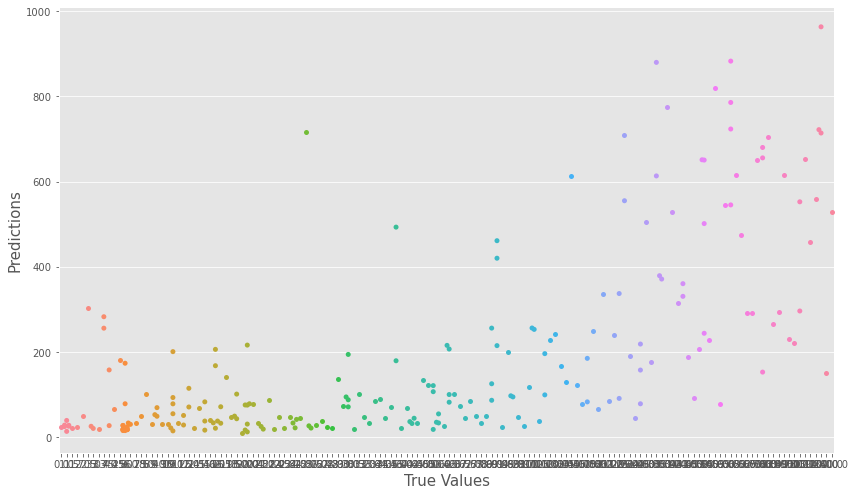

In [163]:
plt.figure(figsize=(12,7))
y_pred=Final_mod.predict(X_test)
sns.swarmplot(Y_test.round(2), y_pred)
print(' True Values Vs Predicted Value plot :')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

# Final Regression Saving Model


In [164]:
import joblib
joblib.dump(Final_mod,'Power_plant_regression_.pkl')

['Power_plant_regression_.pkl']